# Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Breakdown of the Problem Statement:

This is a supervised machine learning problem with a target label as (Item_Outlet_Sales)

Also since we are expected to predict the sale price for a given product, it becomes a regression task.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df=pd.read_csv("bigdatamart_Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Checking categorical attributes

cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
cat_col
       

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

# Checking Missing Values

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.isnull().sum().sum()

3873

<AxesSubplot:>

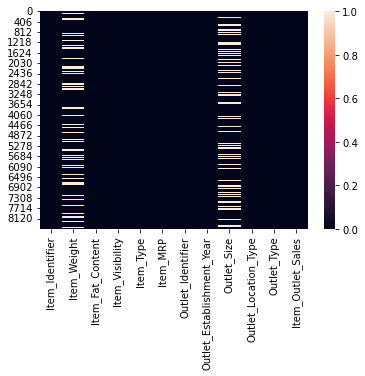

In [11]:
sns.heatmap(df.isnull())

Observations: 

There are null values in the dataset in the column, Item weight amd Outlet Size.

Item_Weight (dtype: float) has 1463 and Outlet_Size (dtype: int) has 2410 missing values.


# Replacing Missing Values

In [12]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

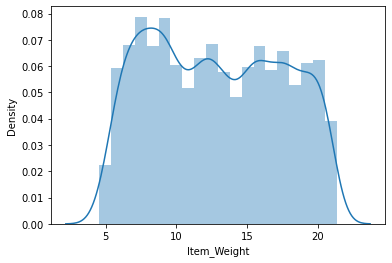

In [13]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight'>

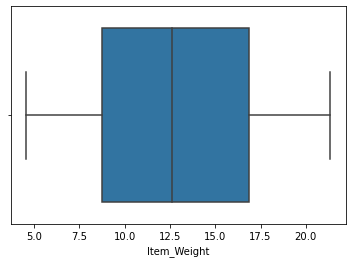

In [14]:
sns.boxplot(df['Item_Weight'])

Let's replace the missing value in Item Weight.

Since its normally distributed we will take the mean value to replace it

In [15]:
df['Item_Weight'].mean()

12.857645184136183

In [16]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()),inplace=True)

In [17]:
df['Item_Weight'].isnull().sum()

0

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Done!!

We have replace the NaN value in Outlet_Size

In [19]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Since its an Object data we have to use mode method however Outlet Size depends on the Outlet type.

So we will also see if in our data set the outlet type has any impact on outlet size

In [20]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

There are 4 categories in Outlet type. Let's check if any of the outlet type has any impact on the size

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

This is done.

Now lets see if any other type has any impact

In [23]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hyg

Observations:

Data in 'Item_Fat_Content' has not been updated correctly. Low Fat is updated as low fat and LF as well whereas reg is updated for Regular.

We will need to correct this.

In [24]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now we can see that the Item fat content in training data is correctly updated.

In [26]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

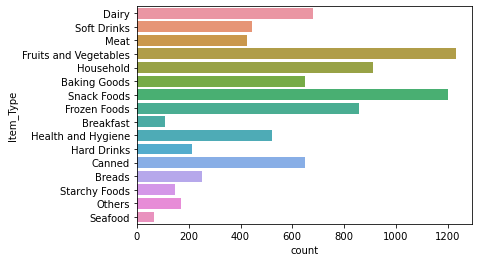

In [27]:
sns.countplot(y='Item_Type',data=df)

From the above we can say: Fruits and vegetables are sold the maximum across the outlet, followed by Snackfood and household items. Seafood and Breakfast items were sold the least

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

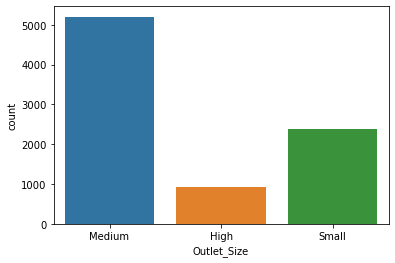

In [28]:
sns.countplot(x='Outlet_Size',data=df)

In terms of size in outlet, Medium is dominating followed by small

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

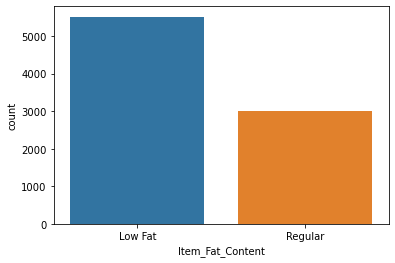

In [29]:
sns.countplot(x='Item_Fat_Content',data=df)

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

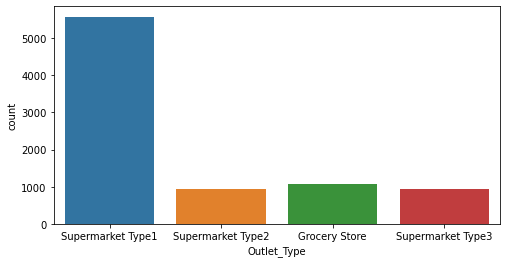

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(x='Outlet_Type',data=df)

Supermarket Type 1 has the maximum presence. There is huge difference in other outet types.

In [32]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

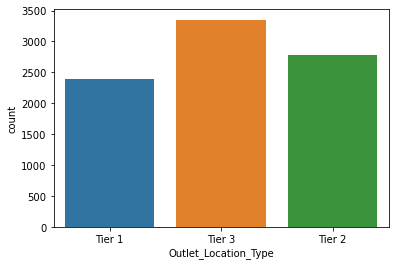

In [33]:
sns.countplot(x='Outlet_Location_Type',data=df)

Tier type 3 outlet has the good presence followed by Tier 2

In [34]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

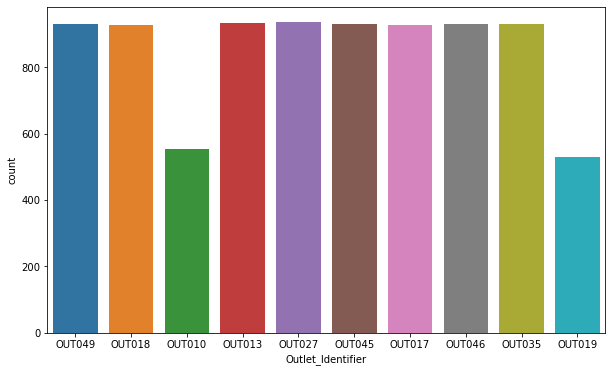

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Identifier',data=df)

In [36]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Text(0, 0.5, 'Item_Outlet_Sales')

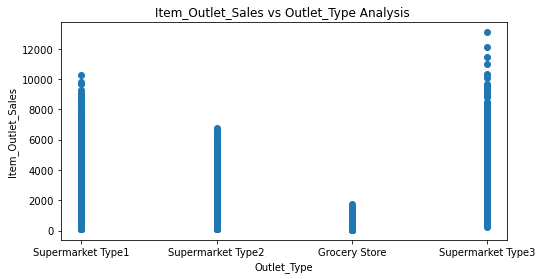

In [37]:
plt.figure(figsize=(8,4))
plt.scatter('Outlet_Type','Item_Outlet_Sales',data=df)
plt.title("Item_Outlet_Sales vs Outlet_Type Analysis ")
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")

Observations:
Supermarket Type 3 is generating more sales whereas grocery store are contributing very less towards the sales figures

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

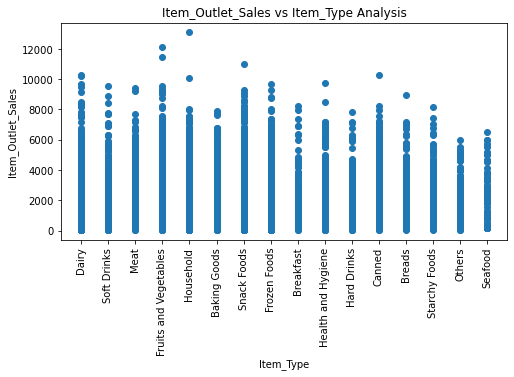

In [38]:
plt.figure(figsize=(8,4))
plt.scatter('Item_Type','Item_Outlet_Sales',data=df)
plt.title("Item_Outlet_Sales vs Item_Type Analysis")
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.xticks(rotation=90)

Findings from all the plots above:

Medium size Supermarket type 3 outlet in Tier 3 loaction generate more revenue.

Small size Grocery store in Tier 3 loaction generates less revenue

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

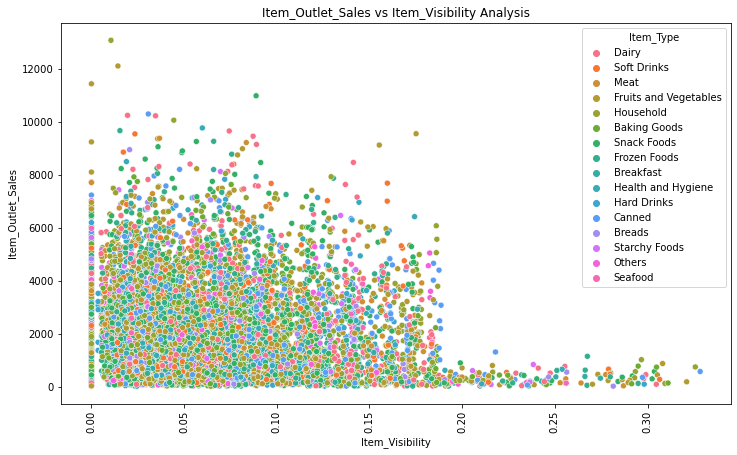

In [39]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue="Item_Type",data=df)
plt.title("Item_Outlet_Sales vs Item_Visibility Analysis")
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.xticks(rotation=90)

high visibility items having low sales as compared to low visibility items

Most of the items are food items which having lower visibility 

Text(0, 0.5, 'Item_Outlet_Sales')

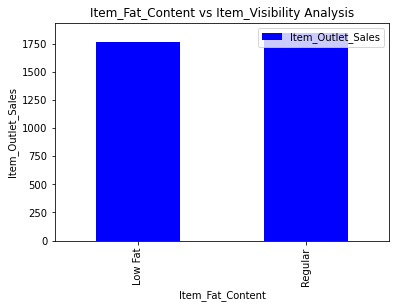

In [40]:
Item_Fat_Content_pivot=\
df.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar',color='blue')
plt.title("Item_Fat_Content vs Item_Visibility Analysis")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")

Regular food item having slightly higher sales values as compared to low fat content items

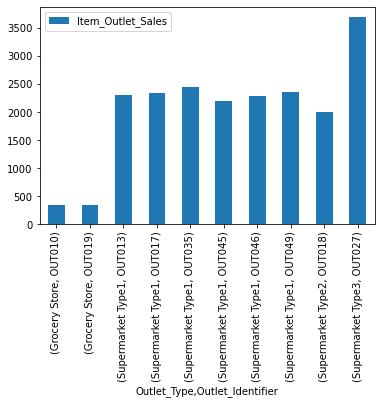

In [41]:
df.groupby(['Outlet_Type','Outlet_Identifier']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

Supermarket Type 3(OUT027) contributes largely towards the Sales. Rest other are close to each other but very less sale is generated from Grocery store(OUT 10 and 19)

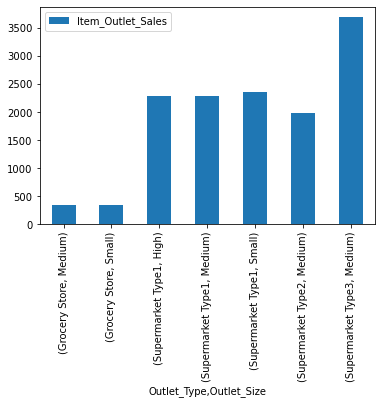

In [42]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

Here again Medium size Supermarket type 3 dominates the sales chart. Other are close to each other but the least sale is generated from Small type grocery store

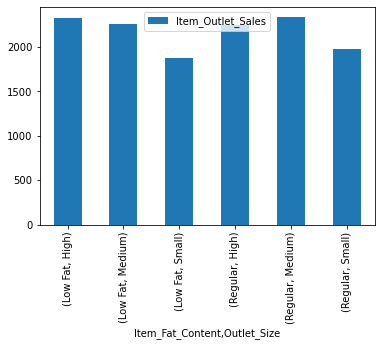

In [43]:
df.groupby(['Item_Fat_Content','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

Medium size outlet in Tier 3 are giving good sales output whereas Small size outlet in Tier 3 are showing poor sales record

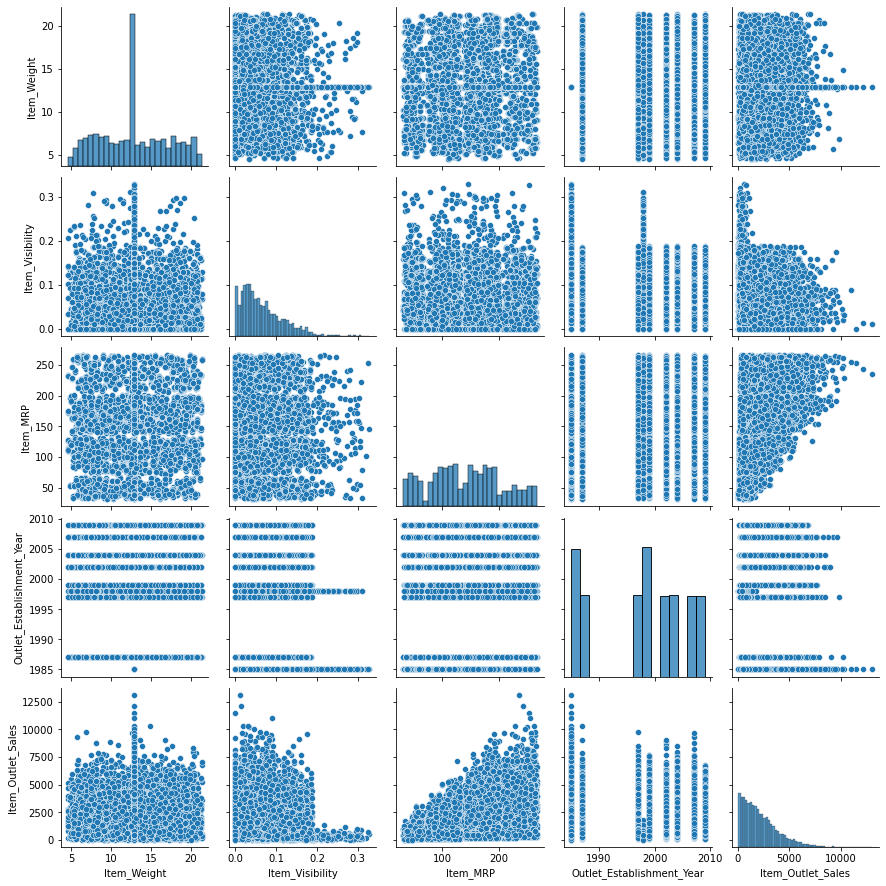

In [44]:
sns.pairplot(data=df)

Checking for outliers through box plot

There is not much of the outliers present in the dataset

<AxesSubplot:>

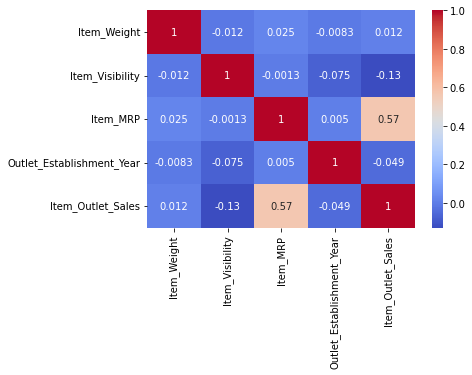

In [45]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

As we can see that Outlet Sales is corealted to Item MRP and Item weight has least impact on the Sales

# Using LabelEncoder to change the data type

In [46]:
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [47]:
Object=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
for i in Object:
    df[i]=le.fit_transform(df[i])

In [50]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [51]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

# Removing Outliers

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [53]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [54]:
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

Old Dataframe (8523, 12)
New Dataframe (8338, 12)
total_dropped_rows 185


In [55]:
loss_percent=(8523-8338)/8523*100
print(loss_percent,'%')

2.170597207556025 %


In [56]:
df_new.skew()

Item_Identifier             -0.007837
Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label 

In [57]:
x=df_new.iloc[:,0:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [58]:
y=df_new.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

# VIF to check multicolinearity

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [61]:
vif_calc()

    VIF Factor                   features
0     4.074391            Item_Identifier
1    10.180759                Item_Weight
2     1.599161           Item_Fat_Content
3     2.895996            Item_Visibility
4     4.042377                  Item_Type
5     6.136299                   Item_MRP
6    15.612533          Outlet_Identifier
7    56.674440  Outlet_Establishment_Year
8     7.823082                Outlet_Size
9    16.606380       Outlet_Location_Type
10    8.473150                Outlet_Type


# Transforming data to remove skewness:

In [62]:
from sklearn.preprocessing import power_transform

In [63]:
x=power_transform(x,method='yeo-johnson')

In [64]:
x

array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  1.3926764 ,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  1.3926764 ,
        -1.37581641, -0.13467763]])

In [65]:
x.mean()

5.7715425340857265e-18

In [66]:
x= pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,-1.459702,-0.817074,-0.736645,-1.141715,-0.712790,1.640811,1.417704,0.029416,-0.287604,-1.375816,-0.134678
1,-2.093720,-1.724772,1.357506,-1.032542,1.506345,-1.591460,-0.557335,1.449643,-0.287604,1.095089,1.056886
2,-0.154073,1.079385,-0.736645,-1.117360,0.684664,0.097475,1.417704,0.029416,-0.287604,-1.375816,-0.134678
3,0.771153,1.437749,1.357506,-1.733193,-0.215907,0.707513,-1.816508,-0.095546,-0.287604,1.095089,-1.971851
4,1.094946,-0.911576,-0.736645,-1.733193,0.468417,-1.471032,-1.351820,-1.296374,-1.916825,1.095089,-0.134678
...,...,...,...,...,...,...,...,...,...,...,...
8333,-0.843343,-1.459868,-0.736645,0.032169,1.306593,1.165936,-1.351820,-1.296374,-1.916825,1.095089,-0.134678
8334,0.336889,-1.054004,1.357506,-0.213519,-1.921762,-0.449333,0.801010,0.421941,-0.287604,-0.126391,-0.134678
8335,1.202384,-0.492683,-0.736645,-0.538175,0.246782,-0.856888,0.479796,0.699000,1.392676,-0.126391,-0.134678
8336,-0.112700,-1.365545,1.357506,1.535557,1.306593,-0.535714,-0.557335,1.449643,-0.287604,1.095089,1.056886


In [67]:
x.skew()

0    -0.293569
1    -0.069766
2     0.620973
3     0.115911
4    -0.165742
5    -0.112576
6    -0.214995
7    -0.224452
8    -0.043996
9    -0.216731
10    0.010691
dtype: float64

# Standardizing the Input Data:

In [68]:
from sklearn.preprocessing import StandardScaler
# transform my dataset into a standard normal distribution
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  1.3926764 ,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  1.3926764 ,
        -1.37581641, -0.13467763]])

In [69]:
x.mean()

-8.599211023939807e-18

In [70]:
x.shape

(8338, 11)

In [71]:
y.shape

(8338,)

# Model Building

In [72]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [73]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is: 0.5189118786415094
At random state0,the testing accuracy is: 0.5078206648713817


At random state1,the training accuracy is: 0.5153185974839531
At random state1,the testing accuracy is: 0.5229378201658602


At random state2,the training accuracy is: 0.5176302303781474
At random state2,the testing accuracy is: 0.5122608277303682


At random state3,the training accuracy is: 0.5213357720904417
At random state3,the testing accuracy is: 0.49915644242604107


At random state4,the training accuracy is: 0.5116703659980613
At random state4,the testing accuracy is: 0.5344184219106229


At random state5,the training accuracy is: 0.5196751895369723
At random state5,the testing accuracy is: 0.5035519151481501


At random state6,the training accuracy is: 0.5200134752431385
At random state6,the testing accuracy is: 0.5042319202722342


At random state7,the training accuracy is: 0.5201882546580858
At random state7,the testing accuracy is: 0.5034968939316469



At random state84,the training accuracy is: 0.5199182744458427
At random state84,the testing accuracy is: 0.5040131023284025


At random state85,the training accuracy is: 0.5168356888023729
At random state85,the testing accuracy is: 0.5169163542379451


At random state86,the training accuracy is: 0.5178164047122376
At random state86,the testing accuracy is: 0.5126617039830959


At random state87,the training accuracy is: 0.5211886756846948
At random state87,the testing accuracy is: 0.49907170260576517


At random state88,the training accuracy is: 0.5152104052801836
At random state88,the testing accuracy is: 0.5229738477679903


At random state89,the training accuracy is: 0.5161686412929205
At random state89,the testing accuracy is: 0.5192894571787234


At random state90,the training accuracy is: 0.5179698524423648
At random state90,the testing accuracy is: 0.5113953982138897


At random state91,the training accuracy is: 0.5189341631046414
At random state91,the testing accuracy is: 0.50

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [75]:
r2_score(y_train,pred_train)

0.5182523853983394

In [76]:
r2_score(y_test,pred_test)

0.5109184093980249

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [78]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

In [79]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model:', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model:' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model:', r2_score(y_test,m.predict(x_test) )*100)
    print('\n')

mean_absolute_error of  LinearRegression() model: 851.9011772341589
mean_square_error of LinearRegression() model: 1230306.5769124913
R2 Score of LinearRegression() model: 51.09184093980249


mean_absolute_error of  Ridge() model: 851.8776598761972
mean_square_error of Ridge() model: 1230277.810584699
R2 Score of Ridge() model: 51.092984482527235


mean_absolute_error of  Lasso() model: 851.7162994971779
mean_square_error of Lasso() model: 1230113.38426123
R2 Score of Lasso() model: 51.09952089299015


mean_absolute_error of  DecisionTreeRegressor() model: 1012.9799730215827
mean_square_error of DecisionTreeRegressor() model: 2071775.9419452895
R2 Score of DecisionTreeRegressor() model: 17.6410585725432


mean_absolute_error of  SVR() model: 1168.5897272486848
mean_square_error of SVR() model: 2350633.7217682833
R2 Score of SVR() model: 6.555674728637618


mean_absolute_error of  KNeighborsRegressor() model: 813.9292436690647
mean_square_error of KNeighborsRegressor() model: 1299981.30

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.5149776152324883


Mean Accuracy of Ridge()
0.5149784416031495


Mean Accuracy of Lasso()
0.5150189127986935


Mean Accuracy of DecisionTreeRegressor()
0.12151435478442844


Mean Accuracy of SVR()
0.05763398082310476


Mean Accuracy of KNeighborsRegressor()
0.48123117336469134


Mean Accuracy of RandomForestRegressor()
0.5369412868985766




In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [84]:
#final model training
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

51.77615327178123

In [99]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5148134852100122

In [85]:
from sklearn.linear_model import Ridge, Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rg=Ridge()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [91]:
#final model training
rg=Ridge(alpha=10,random_state=0)
rg.fit(x_train,y_train)
rg_score_training=rg.score(x_train,y_train)
pred_rg=rg.predict(x_test)
rg_score_training*100

51.82493367899417

In [100]:
cv_score=cross_val_score(rg,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5149834084966091

We got 0.51 score for training and 0.50 through cross validation from Lasso

As there is not much Hyperparmters for Linear regression we will fit our Final Model

In [101]:
Finalmod=LinearRegression(copy_X=True, fit_intercept= True, n_jobs=None, normalize=False)
Finalmod.fit(x_train,y_train)
pred_final=Finalmod.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmod,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 51.09184093980249
Cross Val score 51.49776152324883


# Lets Visualize our model

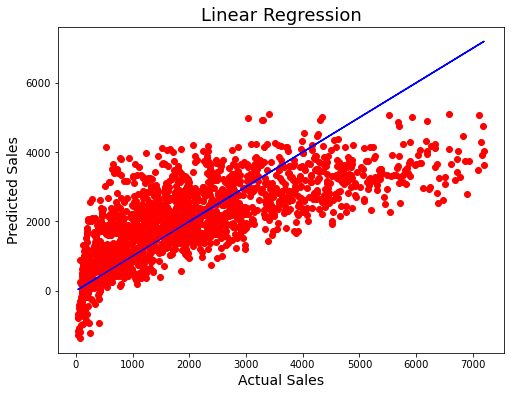

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The model is performing ok as we got only 51% accuracy

Lets create our object file for the final model

In [112]:
test=pd.read_csv("bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [113]:
Object_test=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [114]:
for i in Object_test:
    test[i]=le.fit_transform(test[i])

In [115]:
sc_test=sc.fit_transform(test)

In [116]:
X=sc_test

In [117]:
X=pd.DataFrame(X,columns=test.columns)

In [135]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.739896,1.726792,-0.575284,-1.134077,1.366916,-0.536555,1.507689,0.139891,-0.744484,-1.369215,-0.252769
1,0.659085,-0.942389,4.104698,-0.531850,-0.766450,-0.868937,-0.959749,1.095512,1.277707,-0.138827,-0.252769
2,1.420050,0.408281,-0.575284,0.661316,0.892835,1.629848,-1.664731,0.020438,1.277707,1.091560,-1.507994
3,0.079943,-1.153565,-0.575284,-0.981416,1.366916,0.226697,-0.959749,1.095512,1.277707,-0.138827,-0.252769
4,0.921719,NaN,0.984710,1.032540,-0.766450,1.508110,0.097725,-1.532446,-0.744484,1.091560,2.257683
...,...,...,...,...,...,...,...,...,...,...,...
5676,-1.217514,-0.470726,0.984710,-1.018333,1.366916,0.004727,1.155198,-0.099015,0.266612,-1.369215,-0.252769
5677,-1.049159,-1.092463,0.984710,1.508493,1.840998,0.455014,-0.607258,1.334417,-0.744484,1.091560,1.002457
5678,1.433519,-0.577922,-0.575284,0.153074,0.181713,-0.360485,0.802707,0.498248,1.277707,-0.138827,-0.252769
5679,-0.575520,0.558355,0.984710,-1.281690,-1.003490,1.190844,-0.959749,1.095512,1.277707,-0.138827,-0.252769


In [143]:
X.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [144]:
X['Item_Weight'].fillna((X['Item_Weight'].mean()),inplace=True)

In [145]:
X.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Passsing our model to the test data

In [147]:
import joblib
joblib.dump(Finalmod,'BigDataMart_sales.obj')

['BigDataMart_sales.obj']

In [148]:
loaded_model=joblib.load('BigDataMart_sales.obj')

In [149]:
Test_pred=loaded_model.predict(X)

In [150]:
Test=pd.DataFrame(data=Test_pred)
Test

,0
0,1942.240509
1,1002.715985
2,2011.048535
3,1953.489927
4,5059.191165
...,...
5676,2346.881843
5677,2955.941564
5678,1475.805183
5679,2852.404777


Predicted Values



Lets Join the predicted value with the test dataset

In [152]:
Test_final1=test.join(Test)
Test_final1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,0
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1,1942.240509
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1,1002.715985
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0,2011.048535
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1,1953.489927
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,5059.191165
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1,2346.881843
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2,2955.941564
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,3,1,1,1475.805183
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,3,1,1,2852.404777


In [153]:
Test_final1.rename(columns={0: 'Item_Outlet_Sales'}, inplace=True)

In [154]:
Test_final1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1,1942.240509
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1,1002.715985
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0,2011.048535
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1,1953.489927
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,5059.191165
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1,2346.881843
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2,2955.941564
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,3,1,1,1475.805183
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,3,1,1,2852.404777


# Completed